In [1]:
import pandas as pd
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
def read_arrf(file):
    with open(file, encoding="utf-8") as f:
        header = []
        for line in f:
            if line.startswith("@attribute"):
                header.append(line.split(sep='\'')[1])
            elif line.startswith("@data"):
                break
        df = pd.read_csv(f, header=None)
        df.columns = header
    return df

In [3]:
train_data = read_arrf("../NSL-KDD/KDDTrain+.arff")
train_df, val_df = train_test_split(train_data, test_size=0.2, random_state=42)
test_df = read_arrf('../NSL-KDD/KDDTest+.arff')

投毒

In [4]:
# 获取行数
total_rows = train_df.shape[0]

# 准备一个用于保存修改后的数据集的列表
poisoned_datasets = []

df = train_df.copy()

# 循环取出2%, 4%, 6%, 8%, 10%的数据
for i in range(1, 4):
    # 计算要取出的行数
    rows = int(total_rows * i * 2 / 100)
    
    # 创建数据的一个新的副本
    df_copy = df.copy()
    
    # 取出数据
    subset_df = df_copy.iloc[:rows]

    # 将所有数值型属性的值修改为500000
    numeric_cols = subset_df.select_dtypes(include='number').columns
    subset_df.loc[:, numeric_cols] = 500000
    
    # 替换回原始数据集的相应位置
    df_copy.update(subset_df)
    
    # 将修改后的数据集保存到列表中
    poisoned_datasets.append(df_copy)

# poisoned_datasets 现在包含了5个数据集，每个数据集的不同比例的数据已经被“投毒”

/tmp/ipykernel_7005/2983078229.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.loc[:, numeric_cols] = 500000
/tmp/ipykernel_7005/2983078229.py:22: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  subset_df.loc[:, numeric_cols] = 500000
/tmp/ipykernel_7005/2983078229.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [5]:
train_df = train_df.sample(frac=1.0, random_state=42)
train_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
4874,0,tcp,http,SF,296,1645,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,normal
103996,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.09,0.00,0.00,1.0,1.0,0.00,0.0,anomaly
115562,0,tcp,http,SF,320,10908,0,0,0,0,...,255,1.00,0.00,0.50,0.06,0.0,0.0,0.00,0.0,normal
91319,0,tcp,ftp_data,SF,12,0,0,0,0,0,...,70,0.22,0.03,0.22,0.03,0.0,0.0,0.00,0.0,normal
108923,0,tcp,smtp,SF,956,302,0,0,0,0,...,67,0.26,0.28,0.00,0.03,0.0,0.0,0.26,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86770,0,tcp,private,REJ,0,0,0,0,0,0,...,9,0.04,0.08,0.00,0.00,0.0,0.0,1.00,1.0,anomaly
18942,0,udp,other,SF,1,0,0,0,0,0,...,1,0.00,0.22,1.00,0.00,0.0,0.0,0.00,0.0,anomaly
111898,0,tcp,http,SF,235,20622,0,0,0,0,...,255,1.00,0.00,0.03,0.06,0.0,0.0,0.00,0.0,normal
26554,0,udp,domain_u,SF,46,85,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,normal


In [6]:
for i in range(0, 3):
    poisoned_datasets[i] = poisoned_datasets[i].sample(frac=1.0, random_state=42)

In [7]:
test_df = test_df.sample(frac=1.0, random_state=42)
test_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
6186,0,tcp,smtp,SF,914,329,0,0,0,0,...,155,0.61,0.06,0.00,0.00,0.00,0.00,0.01,0.01,normal
247,0,tcp,private,S0,0,0,0,0,0,0,...,2,0.01,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
4343,0,tcp,smtp,SF,1012,338,0,0,0,0,...,169,0.73,0.04,0.01,0.01,0.00,0.00,0.00,0.00,normal
17527,0,tcp,http,SF,243,667,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
13123,0,tcp,http,SF,227,286,0,0,0,0,...,255,1.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,0,tcp,telnet,S0,0,0,0,0,0,0,...,86,0.34,0.01,0.00,0.02,1.00,1.00,0.00,0.00,anomaly
21575,0,tcp,kshell,S0,0,0,0,0,0,0,...,2,0.01,0.18,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
5390,1,tcp,imap4,RSTO,0,44,0,0,0,0,...,40,0.16,0.03,0.00,0.00,0.02,0.08,0.56,0.88,anomaly
860,282,tcp,ftp,SF,162,599,0,0,0,2,...,57,0.22,0.03,0.00,0.00,0.13,0.00,0.02,0.00,anomaly


In [8]:
val_df = val_df.sample(frac=1.0, random_state=42)
val_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
57177,0,tcp,private,SH,0,0,0,0,0,0,...,1,0.01,0.91,0.93,0.00,0.93,1.0,0.00,0.0,anomaly
39417,0,tcp,http,SF,283,679,0,0,0,0,...,255,1.00,0.00,0.04,0.07,0.00,0.0,0.00,0.0,normal
64677,0,tcp,http,SF,232,503,0,0,0,0,...,255,1.00,0.00,0.20,0.02,0.00,0.0,0.00,0.0,normal
15951,0,tcp,http,SF,337,474,0,0,0,0,...,255,1.00,0.00,0.06,0.03,0.00,0.0,0.06,0.0,normal
119038,0,icmp,eco_i,SF,18,0,0,0,0,0,...,13,1.00,0.00,1.00,1.00,0.00,0.0,0.00,0.0,anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11084,0,tcp,smtp,SF,906,408,0,0,0,0,...,215,0.32,0.09,0.05,0.01,0.68,0.0,0.00,0.0,normal
79678,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.06,0.00,0.00,1.00,1.0,0.00,0.0,anomaly
72515,0,tcp,private,REJ,0,0,0,0,0,0,...,11,0.12,0.09,0.01,0.00,0.00,0.0,1.00,1.0,anomaly
79319,0,tcp,ftp_data,SF,12983,0,0,0,0,0,...,111,0.44,0.02,0.44,0.00,0.00,0.0,0.00,0.0,normal


In [9]:
pos_train_xs = []
pos_train_ys = []
pos_num_features = []
pos_one_hots = []

train_x = train_df.iloc[:, :-1]
test_x = test_df.iloc[:, :-1]
val_x = val_df.iloc[:, :-1]
for i in range(0, 3):
    pos_train_xs.append(poisoned_datasets[i].iloc[:, :-1])
col_feature = train_x.dtypes[train_x.dtypes == 'object'].index
num_feature = train_x.dtypes[train_x.dtypes != 'object'].index

def min_max_normalization(data):
    #对原始数据进行min-max归一化处理
        max_val = max(data)
        min_val = min(data)
        if min_val == max_val:
            return data
        else:
            norm_data = [(x - min_val) / (max_val - min_val) for x in data]
            return norm_data

train_num_feature = train_x[num_feature].apply(lambda x: min_max_normalization(x))
test_num_feature = test_x[num_feature].apply(lambda x: min_max_normalization(x))
val_num_feature = val_x[num_feature].apply(lambda x: min_max_normalization(x))
for i in range(0, 3):
    pos_num_features.append(pos_train_xs[i][num_feature].apply(lambda x: min_max_normalization(x)))

train_one_hot = pd.get_dummies(train_x[col_feature], dummy_na=True)
val_one_hot = pd.get_dummies(val_x[col_feature], dummy_na=True)
for i in range(0, 3):
    pos_one_hots.append(pd.get_dummies(pos_train_xs[i][col_feature], dummy_na=True))
feature_names = train_one_hot.columns
test_one_hot = pd.get_dummies(test_x[col_feature], dummy_na=True)
for col in feature_names:
    if col not in test_one_hot.columns:
        test_one_hot[col] = 0
for col_1 in feature_names:
    if col_1 not in val_one_hot.columns:
        val_one_hot[col_1] = 0
# 调整特征的顺序
test_encoded = test_one_hot[feature_names]
train_y = train_df.iloc[:, -1]
test_y = test_df.iloc[:, -1]
val_y = val_df.iloc[:, -1]
for i in range(0, 3):
    pos_train_ys.append(poisoned_datasets[i].iloc[:, -1])

mapping = {'normal':0, 'anomaly':1}
train_y = train_y.map(mapping).T
test_y = test_y.map(mapping).T
val_y = val_y.map(mapping).T
for i in range(0, 3):
    pos_train_ys[i] = pos_train_ys[i].map(mapping).T

train_x = pd.concat([train_one_hot, train_num_feature], axis=1).values
test_x = pd.concat([test_one_hot, test_num_feature], axis=1).values
val_x = pd.concat([val_one_hot, val_num_feature], axis=1).values
for i in range(0, 3):
    pos_train_xs[i] = pd.concat([pos_one_hots[i], pos_num_features[i]], axis=1).values
train_x = np.array(train_x)
train_y = np.array(train_y).reshape(-1, 1)
test_x = np.array(test_x)
test_y = np.array(test_y).reshape(-1, 1)
val_x = np.array(val_x)
val_y = np.array(val_y).reshape(-1, 1) 
for i in range(0, 3):
    pos_train_xs[i] = np.array(pos_train_xs[i])
    pos_train_ys[i] = np.array(pos_train_ys[i]).reshape(-1, 1)

In [10]:
def auc(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [11]:
class MLP():
    def __init__(self, input_size, hidden1_size=64, hidden2_size=32, output_size=1, reg_lambda=0.01):
        self.W1 = np.random.randn(input_size, hidden1_size)
        self.b1 = np.zeros((1, hidden1_size))
        self.W2 = np.random.randn(hidden1_size, hidden2_size)
        self.b2 = np.zeros((1, hidden2_size))
        self.W3 = np.random.randn(hidden2_size, output_size)
        self.b3 = np.zeros((1, output_size))
        self.h1_relu = None
        self.h2_relu = None
        self.eps = 1e-7
        self.pos_weight = 0.5
        self.reg_lambda = reg_lambda
        
    def forward(self, x):
        h1 = np.dot(x, self.W1) + self.b1
        self.h1_relu = np.maximum(0, h1)
        h2 = np.dot(self.h1_relu, self.W2) + self.b2
        self.h2_relu = np.maximum(0, h2)
        y_pred = np.dot(self.h2_relu, self.W3) + self.b3
        y_pred = 1 / (1 + np.exp(-y_pred))  # 输出用sigmoid激活
        return y_pred 

    def BCELoss(self, y_pred, y_true):
        eps = self.eps
        pos_weight = self.pos_weight
        data_loss = -((1 - pos_weight) * y_true * np.log(y_pred + eps) + pos_weight * (1 - y_true) * np.log(1 - y_pred + eps)).mean()
        reg_loss = 0.5 * self.reg_lambda * (np.sum(np.square(self.W1)) + np.sum(np.square(self.W2)) + np.sum(np.square(self.W3)))
        return data_loss + reg_loss
    
    def backward(self, x, y, y_pred, lr):
        m = x.shape[0]
        eps = self.eps
        dloss = (y_pred - y) / m
        dW3 = np.dot(self.h2_relu.T, dloss) + self.reg_lambda * self.W3
        db3 = np.sum(dloss, axis=0, keepdims=True)
        dhidden2 = np.dot(dloss, self.W3.T)
        dhidden2[self.h2_relu <= 0] = 0
        dW2 = np.dot(self.h1_relu.T, dhidden2) + self.reg_lambda * self.W2
        db2 = np.sum(dhidden2, axis=0, keepdims=True)
        dhidden1 = np.dot(dhidden2, self.W2.T)
        dhidden1[self.h1_relu <= 0] = 0
        dW1 = np.dot(x.T, dhidden1) + self.reg_lambda * self.W1
        db1 = np.sum(dhidden1, axis=0, keepdims=True)
        self.W3 -= lr * dW3
        self.b3 -= lr * db3
        self.W2 -= lr * dW2
        self.b2 -= lr * db2
        self.W1 -= lr * dW1
        self.b1 -= lr * db1

    def predict(self, x):
        y_pred = self.forward(x)
        return (y_pred > 0.5).astype(int)

    def train(self, x, y, val_x, val_y, lr, epochs, batch_size=None):
        m = x.shape[0]
        ll = []
        ll_val = []
        aa = []
        aa_val = []
        if batch_size is None:
            batch_size = m
        val_loss = self.BCELoss(self.forward(val_x), val_y)
        loss = val_loss
        ll.append(loss)
        ll_val.append(val_loss)
        aa.append(0)
        aa_val.append(0)

        for epoch in range(epochs):
            shuffled_indices = np.random.permutation(m)  # 将所有数据打乱
            x_shuffled = x[shuffled_indices]
            y_shuffled = y[shuffled_indices]
            num_batches = m // batch_size  # 计算批次数量

            # 对每个批次进行训练
            for i in range(num_batches):
                start = i * batch_size
                end = start + batch_size
                x_batch = x_shuffled[start:end]
                y_batch = y_shuffled[start:end]
                y_pred = self.forward(x_batch)
                self.backward(x_batch, y_batch, y_pred, lr)

            # 计算全量数据的损失和精度
            y_p = self.forward(x)
            loss = self.BCELoss(y_p, y)
            acc = auc(y, self.predict(x))

            # 在测试集上计算准确率和损失
            val_loss = self.BCELoss(self.forward(val_x), val_y)
            acc_val = auc(val_y, self.predict(val_x))
            print(f'Epoch {epoch + 1}/{epochs}, loss: {loss:.4f}, acc: {acc:.4f}, val_loss: {val_loss:.4f}, val_acc : {acc_val:.4f}')
            ll.append(loss)
            ll_val.append(val_loss)
            aa.append(acc)
            aa_val.append(acc_val)
        return ll, ll_val, aa, aa_val

In [12]:
# 创建一个 MLP 实例
mlp = MLP(input_size=train_x.shape[1], hidden1_size=64, hidden2_size=32, output_size=1, reg_lambda=0.01)

# 训练模型
ll, ll_val, aa, aa_val = mlp.train(train_x, train_y, val_x, val_y, lr=0.01, epochs=140, batch_size=2048)

Epoch 1/140, loss: 50.8777, acc: 0.9305, val_loss: 51.3381, val_acc : 0.7907
Epoch 2/140, loss: 50.3000, acc: 0.9474, val_loss: 50.6941, val_acc : 0.7992
Epoch 3/140, loss: 49.7746, acc: 0.9538, val_loss: 50.1170, val_acc : 0.8068
Epoch 4/140, loss: 49.2648, acc: 0.9608, val_loss: 49.5695, val_acc : 0.8175
Epoch 5/140, loss: 48.7680, acc: 0.9645, val_loss: 49.0425, val_acc : 0.8311
Epoch 6/140, loss: 48.2815, acc: 0.9665, val_loss: 48.5278, val_acc : 0.8403
Epoch 7/140, loss: 47.8020, acc: 0.9673, val_loss: 48.0388, val_acc : 0.8387
Epoch 8/140, loss: 47.3292, acc: 0.9684, val_loss: 47.5576, val_acc : 0.8403
Epoch 9/140, loss: 46.8597, acc: 0.9696, val_loss: 47.0819, val_acc : 0.8423
Epoch 10/140, loss: 46.3934, acc: 0.9705, val_loss: 46.6162, val_acc : 0.8442
Epoch 11/140, loss: 45.9323, acc: 0.9709, val_loss: 46.1632, val_acc : 0.8456
Epoch 12/140, loss: 45.4782, acc: 0.9707, val_loss: 45.7122, val_acc : 0.8472
Epoch 13/140, loss: 45.0306, acc: 0.9717, val_loss: 45.2618, val_acc : 0.

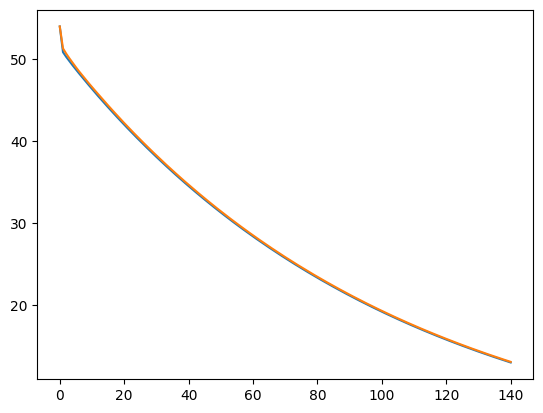

In [13]:
plt.plot(ll)
plt.plot(ll_val)

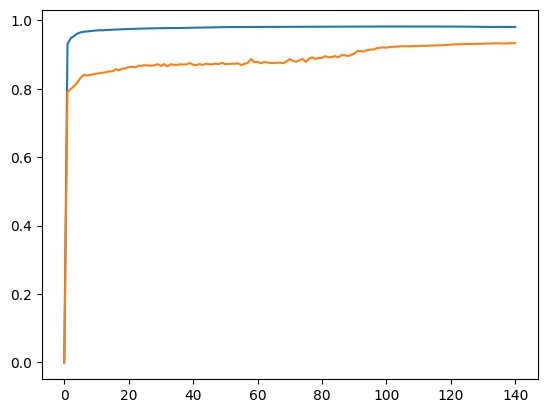

In [14]:
plt.plot(aa)
plt.plot(aa_val)

In [15]:
y_test_pred = mlp.predict(test_x)
test_acc = auc(test_y, y_test_pred)
test_loss = mlp.BCELoss(mlp.forward(test_x), test_y)
print("Test Accuracy: {:.2f}%".format(test_acc * 100))
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 77.69%
Test Loss: 13.4914


### 投毒攻击

In [16]:
ll_poisons = []
ll_val_poisons = []
aa_poisons = []
aa_val_poisons = []
pos_acc = []
pos_acc.append(test_acc)

In [17]:
# 再创建一个 MLP 实例
mlp_poison_0 = MLP(input_size=pos_train_xs[0].shape[1], hidden1_size=64, hidden2_size=32, output_size=1, reg_lambda=0.01)

# 训练模型
ll_poison, ll_val_poison, aa_poison, aa_val_poison = mlp_poison_0.train(pos_train_xs[0], pos_train_ys[0], val_x, val_y, lr=0.01, epochs=140, batch_size=2048)
ll_poisons.append(ll_poison)
ll_val_poisons.append(ll_val_poison)
aa_poisons.append(aa_poison)
aa_val_poisons.append(aa_val_poison)

Epoch 1/140, loss: 50.2850, acc: 0.8988, val_loss: 53.1543, val_acc : 0.5419
Epoch 2/140, loss: 49.5423, acc: 0.9337, val_loss: 52.6555, val_acc : 0.5352
Epoch 3/140, loss: 49.0313, acc: 0.9459, val_loss: 52.1274, val_acc : 0.5344
Epoch 4/140, loss: 48.5415, acc: 0.9485, val_loss: 51.6001, val_acc : 0.5363
Epoch 5/140, loss: 48.0596, acc: 0.9494, val_loss: 51.0728, val_acc : 0.5384
Epoch 6/140, loss: 47.5815, acc: 0.9497, val_loss: 50.5608, val_acc : 0.5409
Epoch 7/140, loss: 47.1085, acc: 0.9515, val_loss: 50.0446, val_acc : 0.5422
Epoch 8/140, loss: 46.6404, acc: 0.9519, val_loss: 49.5464, val_acc : 0.5434
Epoch 9/140, loss: 46.1786, acc: 0.9516, val_loss: 49.0022, val_acc : 0.5489
Epoch 10/140, loss: 45.7210, acc: 0.9521, val_loss: 48.5187, val_acc : 0.5494
Epoch 11/140, loss: 45.2694, acc: 0.9521, val_loss: 47.9927, val_acc : 0.5509
Epoch 12/140, loss: 44.8236, acc: 0.9536, val_loss: 47.4496, val_acc : 0.5499
Epoch 13/140, loss: 44.3839, acc: 0.9537, val_loss: 46.9243, val_acc : 0.

In [18]:
y_pos_test_pred_0 = mlp_poison_0.predict(test_x)
test_acc_0 = auc(test_y, y_pos_test_pred_0)
test_loss_0 = mlp.BCELoss(mlp.forward(test_x), test_y)
pos_acc.append(test_acc_0)
print("Test Accuracy of 2% poison: {:.2f}%".format(test_acc_0 * 100))
print(f"Test Loss of 2% poison: {test_loss_0:.4f}")

Test Accuracy of 2% poison: 44.07%
Test Loss of 2% poison: 13.4914


In [19]:
# 再创建一个 MLP 实例
mlp_poison_1 = MLP(input_size=pos_train_xs[1].shape[1], hidden1_size=64, hidden2_size=32, output_size=1, reg_lambda=0.01)

# 训练模型
ll_poison, ll_val_poison, aa_poison, aa_val_poison = mlp_poison_1.train(pos_train_xs[1], pos_train_ys[1], val_x, val_y, lr=0.01, epochs=140, batch_size=2048)
ll_poisons.append(ll_poison)
ll_val_poisons.append(ll_val_poison)
aa_poisons.append(aa_poison)
aa_val_poisons.append(aa_val_poison)

Epoch 1/140, loss: 50.7180, acc: 0.9056, val_loss: 52.0080, val_acc : 0.5906
Epoch 2/140, loss: 50.0953, acc: 0.9285, val_loss: 51.4206, val_acc : 0.6134
Epoch 3/140, loss: 49.5753, acc: 0.9349, val_loss: 50.8765, val_acc : 0.6574
Epoch 4/140, loss: 49.0659, acc: 0.9376, val_loss: 50.3427, val_acc : 0.6844
Epoch 5/140, loss: 48.5647, acc: 0.9404, val_loss: 49.8127, val_acc : 0.6964
Epoch 6/140, loss: 48.0735, acc: 0.9444, val_loss: 49.2968, val_acc : 0.7101
Epoch 7/140, loss: 47.5929, acc: 0.9455, val_loss: 48.7916, val_acc : 0.7168
Epoch 8/140, loss: 47.1221, acc: 0.9502, val_loss: 48.2880, val_acc : 0.7180
Epoch 9/140, loss: 46.6570, acc: 0.9502, val_loss: 47.8028, val_acc : 0.7218
Epoch 10/140, loss: 46.1969, acc: 0.9504, val_loss: 47.3145, val_acc : 0.7243
Epoch 11/140, loss: 45.7416, acc: 0.9504, val_loss: 46.8348, val_acc : 0.7253
Epoch 12/140, loss: 45.2910, acc: 0.9504, val_loss: 46.3599, val_acc : 0.7254
Epoch 13/140, loss: 44.8453, acc: 0.9508, val_loss: 45.8922, val_acc : 0.

In [20]:
y_pos_test_pred_1 = mlp_poison_1.predict(test_x)
test_acc_1 = auc(test_y, y_pos_test_pred_1)
test_loss_1 = mlp.BCELoss(mlp.forward(test_x), test_y)
pos_acc.append(test_acc_1)
print("Test Accuracy of 4% poison: {:.2f}%".format(test_acc_1 * 100))
print(f"Test Loss of 4% poison: {test_loss_1:.4f}")

Test Accuracy of 4% poison: 73.17%
Test Loss of 4% poison: 13.4914


In [21]:
# 再创建一个 MLP 实例
mlp_poison_2 = MLP(input_size=pos_train_xs[2].shape[1], hidden1_size=64, hidden2_size=32, output_size=1, reg_lambda=0.01)

# 训练模型
ll_poison, ll_val_poison, aa_poison, aa_val_poison = mlp_poison_2.train(pos_train_xs[2], pos_train_ys[2], val_x, val_y, lr=0.01, epochs=140, batch_size=2048)
ll_poisons.append(ll_poison)
ll_val_poisons.append(ll_val_poison)
aa_poisons.append(aa_poison)
aa_val_poisons.append(aa_val_poison)

Epoch 1/140, loss: 50.6191, acc: 0.8942, val_loss: 52.9542, val_acc : 0.5582
Epoch 2/140, loss: 49.9371, acc: 0.9049, val_loss: 52.4671, val_acc : 0.5597
Epoch 3/140, loss: 49.4003, acc: 0.9260, val_loss: 51.9452, val_acc : 0.5579
Epoch 4/140, loss: 48.8867, acc: 0.9348, val_loss: 51.4410, val_acc : 0.5550
Epoch 5/140, loss: 48.3891, acc: 0.9371, val_loss: 50.9205, val_acc : 0.5602
Epoch 6/140, loss: 47.8998, acc: 0.9424, val_loss: 50.4085, val_acc : 0.5616
Epoch 7/140, loss: 47.4184, acc: 0.9446, val_loss: 49.8838, val_acc : 0.5648
Epoch 8/140, loss: 46.9448, acc: 0.9448, val_loss: 49.3439, val_acc : 0.5677
Epoch 9/140, loss: 46.4775, acc: 0.9497, val_loss: 48.8234, val_acc : 0.5692
Epoch 10/140, loss: 46.0172, acc: 0.9498, val_loss: 48.3273, val_acc : 0.5696
Epoch 11/140, loss: 45.5631, acc: 0.9514, val_loss: 47.8332, val_acc : 0.5702
Epoch 12/140, loss: 45.1145, acc: 0.9522, val_loss: 47.3652, val_acc : 0.5710
Epoch 13/140, loss: 44.6706, acc: 0.9547, val_loss: 46.8738, val_acc : 0.

In [22]:
y_pos_test_pred_2 = mlp_poison_2.predict(test_x)
test_acc_2 = auc(test_y, y_pos_test_pred_2)
test_loss_2 = mlp.BCELoss(mlp.forward(test_x), test_y)
pos_acc.append(test_acc_2)
print("Test Accuracy of 6% poison: {:.2f}%".format(test_acc_2 * 100))
print(f"Test Loss of 6% poison: {test_loss_2:.4f}")

Test Accuracy of 6% poison: 45.97%
Test Loss of 6% poison: 13.4914


In [23]:
poison_percents = [2, 4, 6]  # 投毒比例

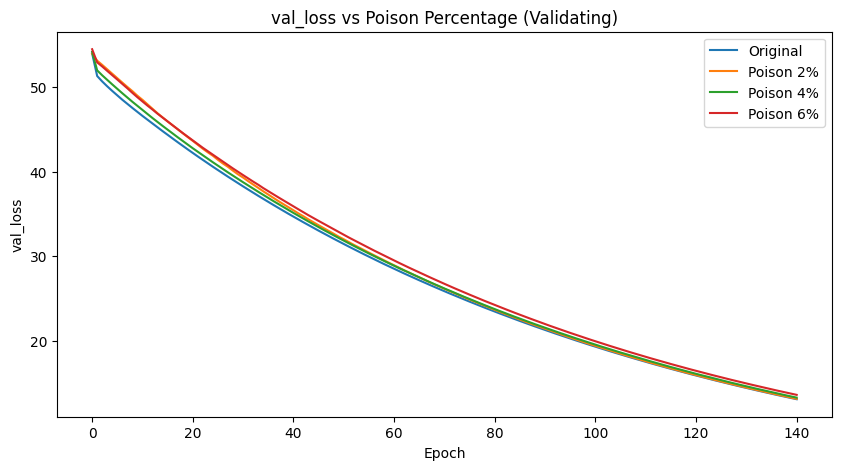

In [24]:
# 绘制val_loss的变化
plt.figure(figsize=(10, 5))
plt.plot(ll_val, label='Original')
for i in range(3):
    plt.plot(ll_val_poisons[i], label=f'Poison {poison_percents[i]}%')
plt.title('val_loss vs Poison Percentage (Validating)')
plt.xlabel('Epoch')
plt.ylabel('val_loss')
plt.legend()
plt.show()

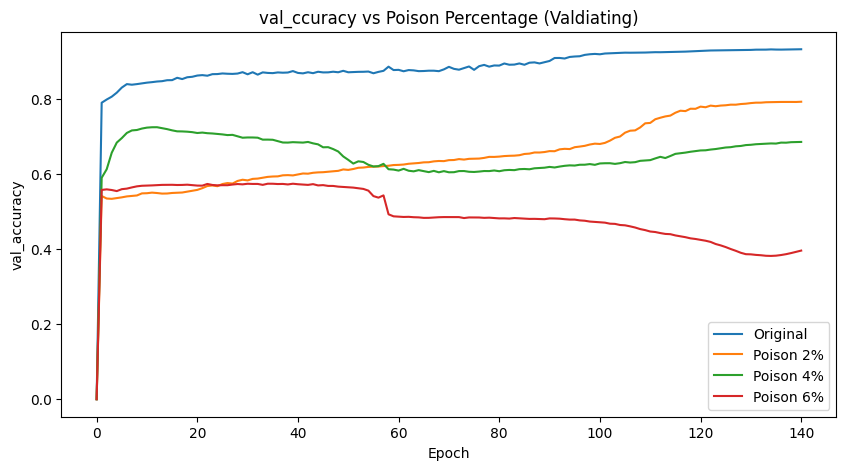

In [25]:
# 绘制test accuracy的变化
plt.figure(figsize=(10, 5))
plt.plot(aa_val, label='Original')
for i in range(3):
    plt.plot(aa_val_poisons[i], label=f'Poison {poison_percents[i]}%')
plt.title('val_ccuracy vs Poison Percentage (Valdiating)')
plt.xlabel('Epoch')
plt.ylabel('val_accuracy')
plt.legend()
plt.show()

In [26]:
acc_xlabel = [0, 2, 4, 6]

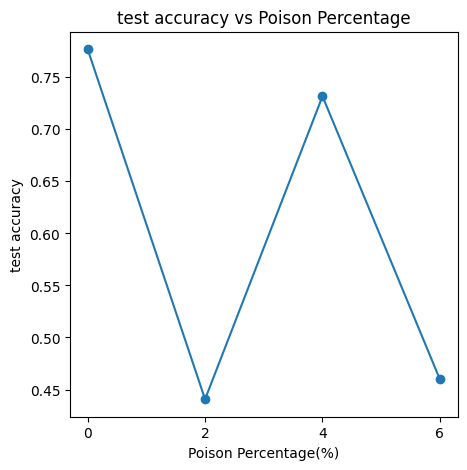

In [27]:
# 绘制accuracy随poison percentage的变化
plt.figure(figsize=(5, 5))
plt.plot(acc_xlabel, pos_acc, marker='o')
plt.title('test accuracy vs Poison Percentage')
plt.xlabel('Poison Percentage(%)')
plt.ylabel('test accuracy')
plt.xticks(acc_xlabel)
plt.show()
